### **PREDICTING STOCK PRICE USING NEURAL PROPHET AND PROPHET**

In [3]:
## Importing necessary libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from prophet import Prophet 
from neuralprophet import NeuralProphet
from prophet.plot import add_changepoints_to_plot
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [6]:
## Loading the dataset  
stock_df = pd.read_csv(r"C:\Users\HP\Downloads\yfinance(1).csv",index_col=0,header=[0,1])
## Laod the data      
stock_df.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.722874  125.150002  80.229012  152.072800  243.072266   
2018-01-03  40.715786  124.820000  80.602394  153.550400  244.609711   
2018-01-04  40.904907  125.459999  81.311806  153.819046  245.640732   
2018-01-05  41.370617  125.330002  82.319908  155.363861  247.277679   
2018-01-08  41.216949  125.309998  82.403923  155.968399  247.729935   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [7]:
## checking the index of stock df  
stock_df.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
       '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Date', length=1509)

In [8]:
## converting the index to datetime  
stock_df.index = pd.to_datetime(stock_df.index)
## check the index again  
stock_df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)

In [10]:
## choosing the Adj close with the AAPL ticker  
Adjusted_close_df = stock_df['Adj Close'][['AAPL']]
Adjusted_close_df.head()

AAPL
Date                 
2018-01-02  40.722874
2018-01-03  40.715786
2018-01-04  40.904907
2018-01-05  41.370617
2018-01-08  41.216949

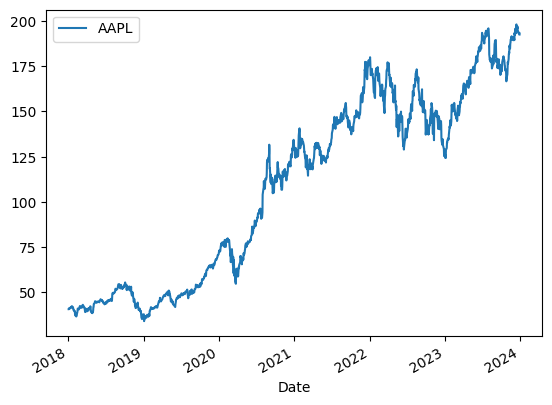

In [12]:
## plot the data  
Adjusted_close_df.plot();

In [14]:
## preparing the data fro prophet 
Adjusted_close_df['ds'] = pd.to_datetime(Adjusted_close_df.index)
Adjusted_close_df['y'] = Adjusted_close_df['AAPL']
## drop 
Adjusted_close_df.drop(columns='AAPL',inplace=True)
### drop thee Date Index  
Adjusted_close_df.reset_index(drop=True,inplace=True)

In [15]:
## check the data  
Adjusted_close_df.head()

ds          y
0 2018-01-02  40.722874
1 2018-01-03  40.715786
2 2018-01-04  40.904907
3 2018-01-05  41.370617
4 2018-01-08  41.216949

### **Model Fitting**

##### **Model 1 Basic Neural Prophet**

In [24]:
## Model Fitting
m1 = NeuralProphet(learning_rate=0.01)
## fit the model 
metrics_train = m1.fit(df=Adjusted_close_df)
## create the future dataframe  
future_m1 = m1.make_future_dataframe(df=Adjusted_close_df,periods=24,n_historic_predictions=True)
## make thee forecast  
forecast_m1 = m1.predict(future_m1)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 24 rows at the end with NaNs in 'y' column.


Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


## **plots**

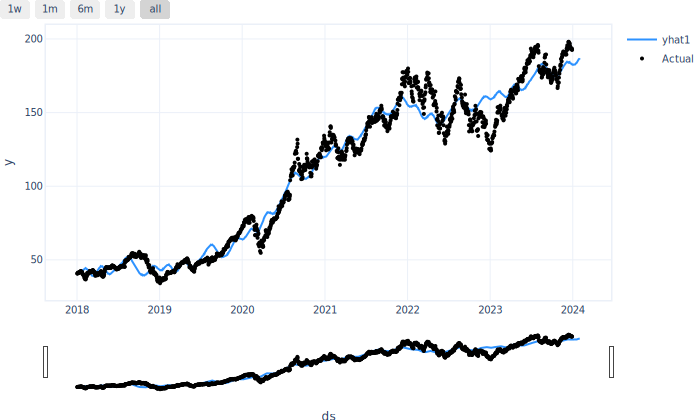

In [25]:
## Forecast plot
m1.plot(fcst=forecast_m1,plotting_backend="plotly-static")

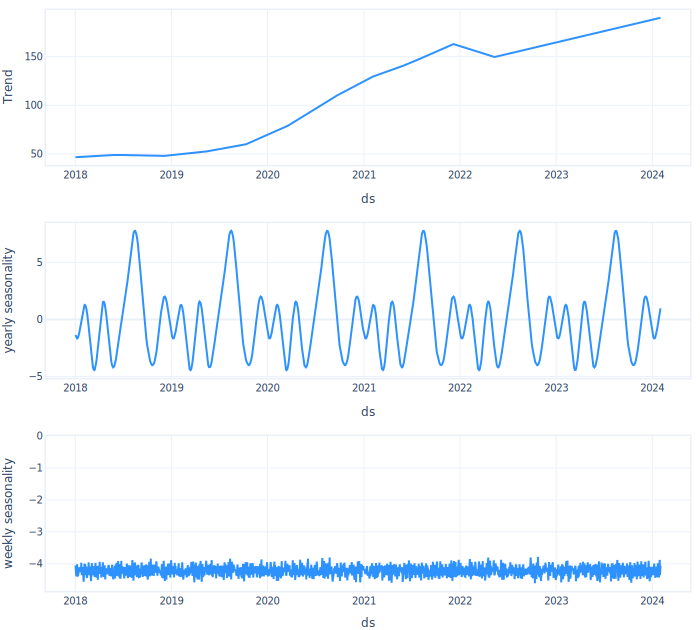

In [26]:
## plotting the components  
m1.plot_components(fcst=forecast_m1,plotting_backend="plotly-static")

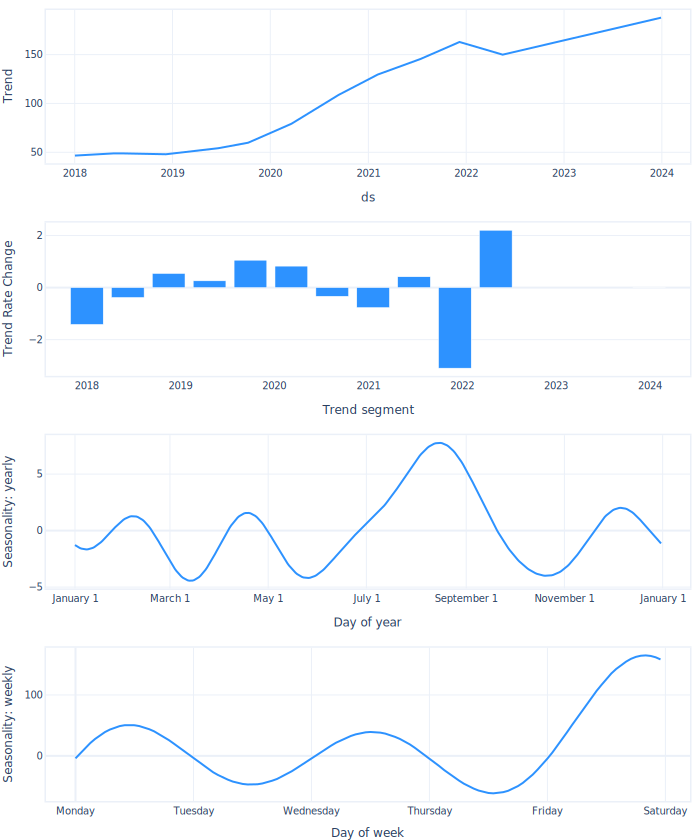

In [27]:
## plot parameters  
m1.plot_parameters(plotting_backend="plotly-static")

### **Model 2 Basic Prophet**

12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:27 - cmdstanpy - INFO - Chain [1] done processing


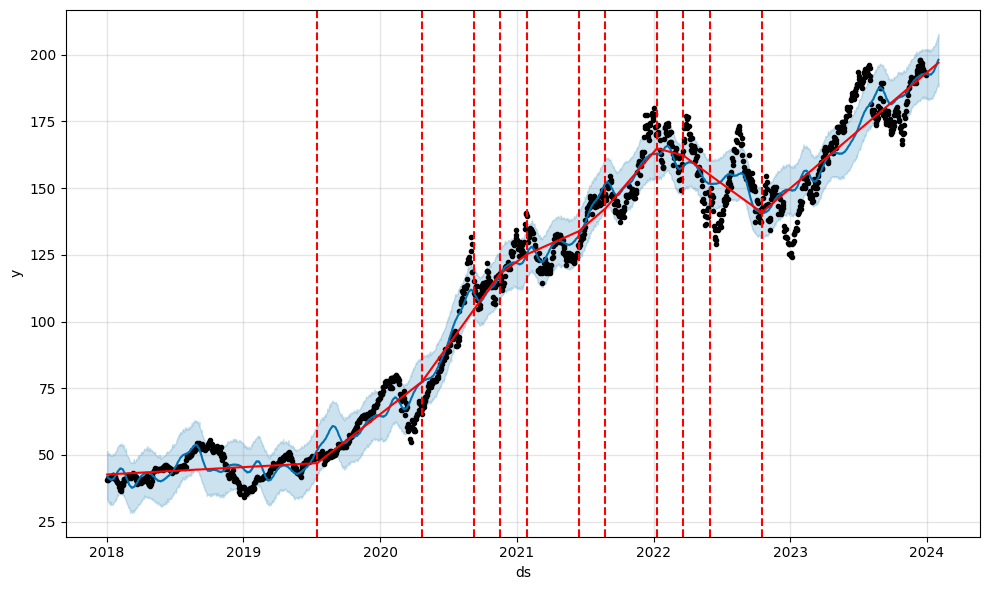

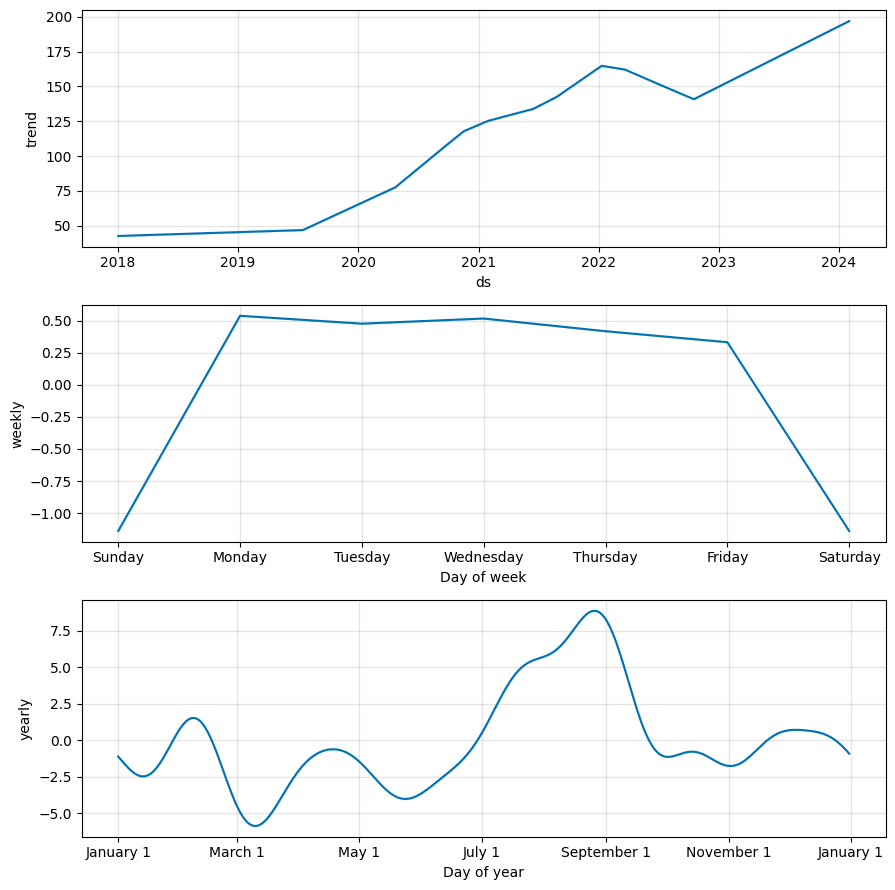

In [28]:
## Model 2 is Basic Prophet 
m2 = Prophet()
## fit the model  
m2.fit(df=Adjusted_close_df)
## make the future dataframe  
future_m2 = m2.make_future_dataframe(periods=24,freq="B")
## make the forecast  
forecast_m2 = m2.predict(future_m2)
## plot  
fig =   m2.plot(fcst=forecast_m2)
## Add changepoints to plot  
a = add_changepoints_to_plot(fig.gca(),m=m2,fcst=forecast_m2)
## plot the componenets  
fig_components = m2.plot_components(fcst=forecast_m2)


### **Model 3 is tunned Prophet**

12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing


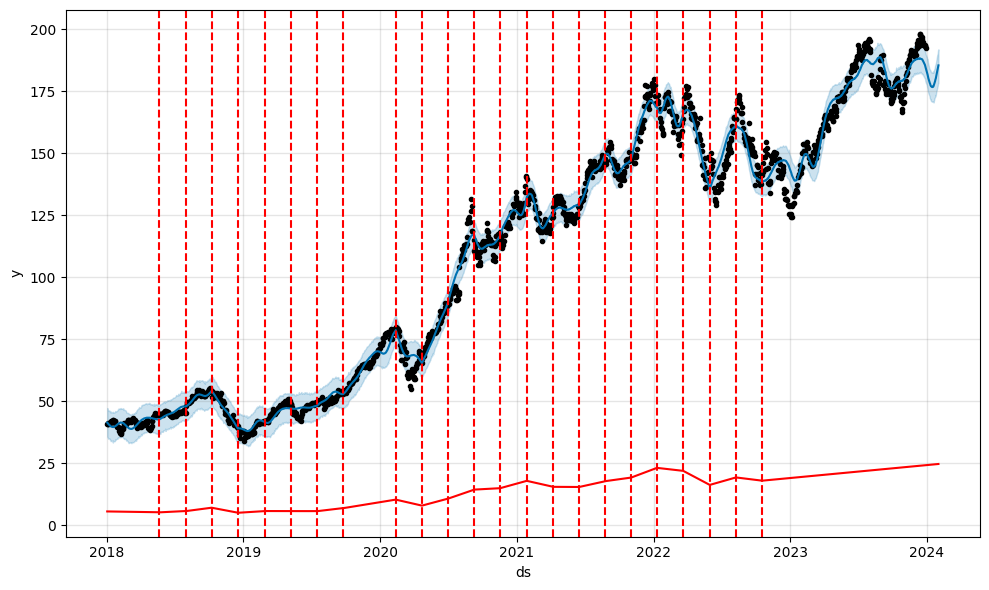

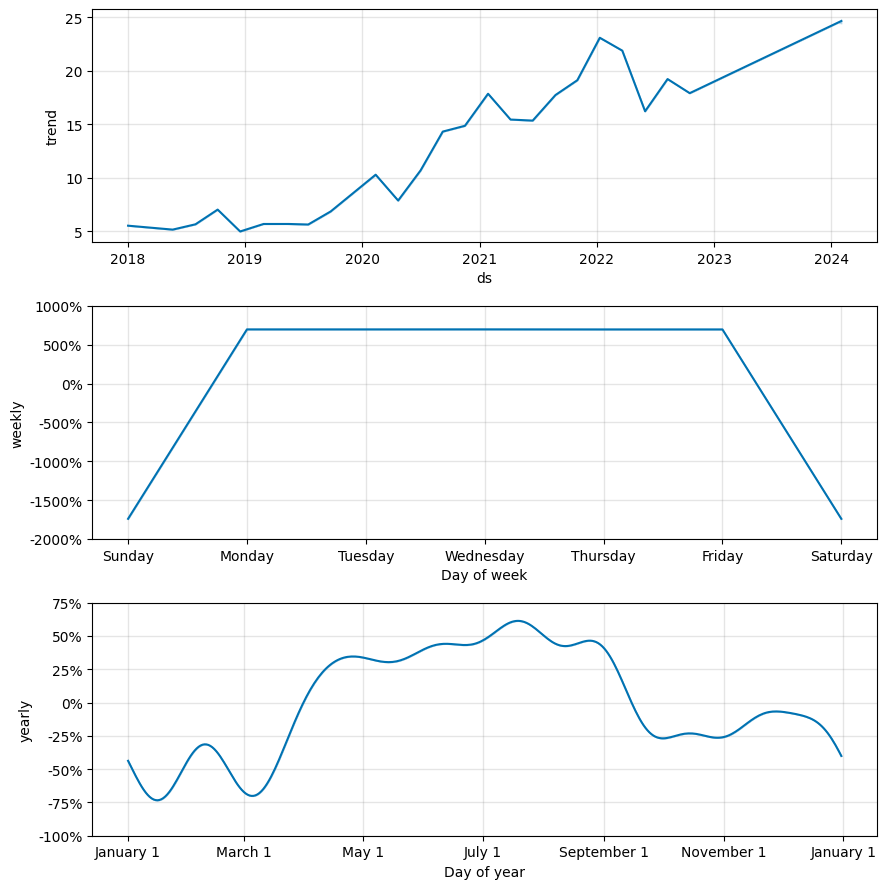

In [29]:
## Model 3 is Tunned Prophet 
m3 = Prophet( 
    changepoint_range=0.8, 
    changepoint_prior_scale=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_prior_scale=10
)
## fit the model  
m3.fit(df=Adjusted_close_df)
## make the future dataframe  
future_m3 = m3.make_future_dataframe(periods=24,freq="B")
## make the forecast 
forecast_m3 = m3.predict(df=future_m3)
## plot the forecast  
fig = m3.plot(fcst=forecast_m3)
## Add change points to the plot  
a = add_changepoints_to_plot(fig.gca(),m=m3,fcst=forecast_m3)
### plot the components  
fig = m3.plot_components(fcst=forecast_m3)

### **Plotting the residuals for model 3**

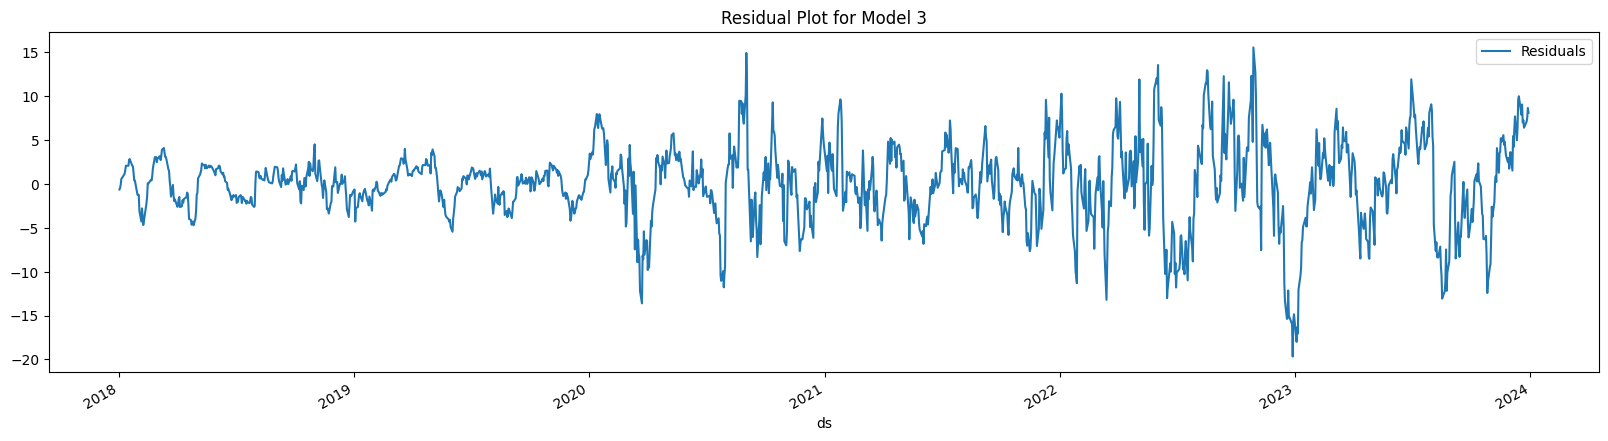

In [32]:
## plotting the residuals for model3 
df_residuals = pd.DataFrame({ 
    "ds":Adjusted_close_df['ds'],"Residuals":Adjusted_close_df['y']-forecast_m3['yhat']
})
## plot  
df_residuals.plot(x="ds",y="Residuals",figsize=(20,5),title="Residual Plot for Model 3");

#### **Model 4 is Tunned Neural Prophet**

In [33]:
## Model 4 is tunned Neural Prophet
m4 =  NeuralProphet(
    yearly_seasonality=True ,
    daily_seasonality=False, 
    weekly_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10,
    learning_rate=0.01, 
    drop_missing= True, 
    quantiles=None
)
## fit the model 
metrics_4 = m4.fit(df=Adjusted_close_df)
## make the future dataframe  
future_m4 = m4.make_future_dataframe(df=Adjusted_close_df,periods=24,n_historic_predictions=True)
## Make the forecast
forecast_m4 = m4.predict(future_m4)


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 24 rows at the end with NaNs in 'y' column.


Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


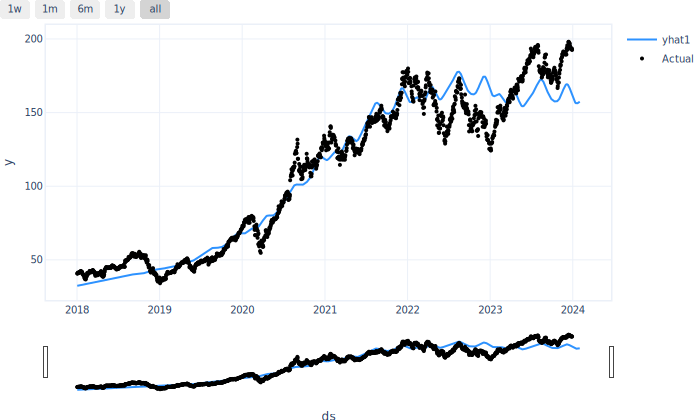

In [35]:
##  plot thee forecast  
m4.plot(fcst=forecast_m4,plotting_backend="plotly-static")

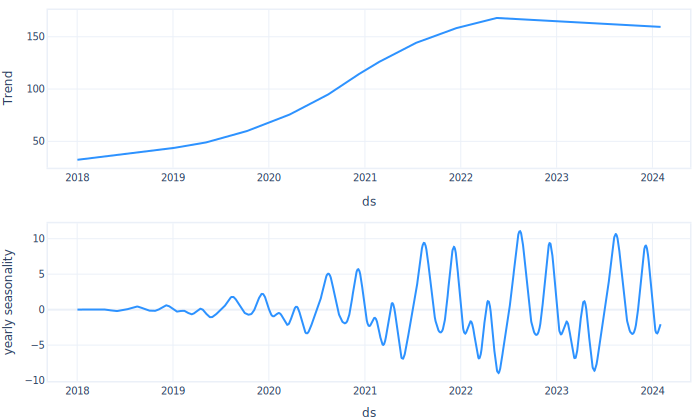

In [36]:
## plotting the componets  
m4.plot_components(fcst=forecast_m4,plotting_backend="plotly-static")

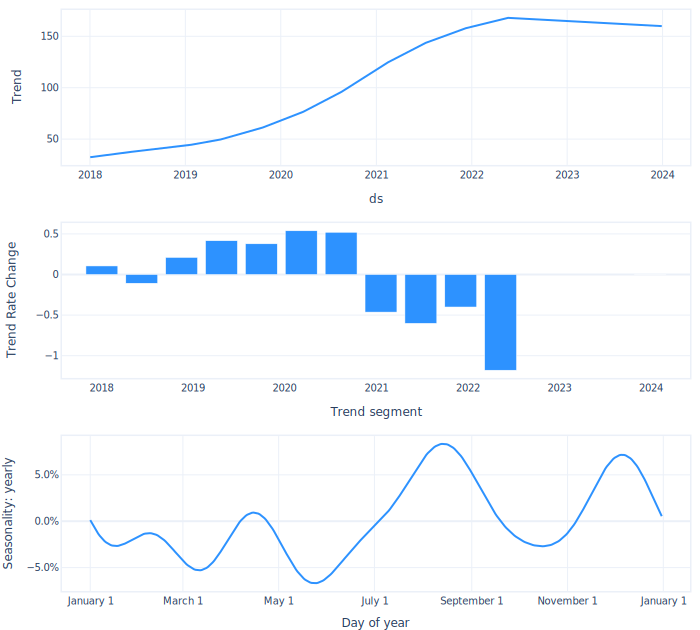

In [37]:
## plot the componets  
m4.plot_parameters(plotting_backend="plotly-static")

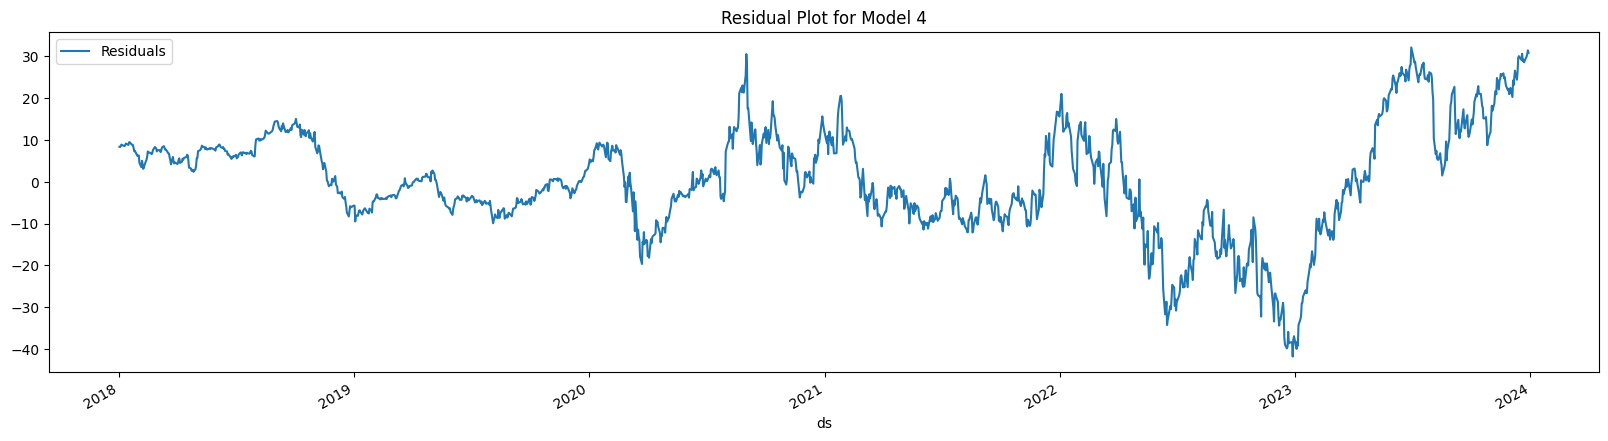

In [38]:
## plot the residuals
## plotting the residuals for model3 
df_residuals = pd.DataFrame({ 
    "ds":Adjusted_close_df['ds'],"Residuals":Adjusted_close_df['y']-forecast_m4['yhat1']
})
## plot  
df_residuals.plot(x="ds",y="Residuals",figsize=(20,5),title="Residual Plot for Model 4");

### **Model 5 Neural Prophet AR Net**

In [39]:
## Model 5 NeuralProphet 
m5 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    learning_rate=0.01, 
    quantiles=None, 
    n_lags=1, 
    ar_layers=[], 
    drop_missing=True
)
## fit the model         
metrics_5 = m5.fit(df=Adjusted_close_df)
## make the future dataframe  
future_m5 = m5.make_future_dataframe(df=Adjusted_close_df,periods=24,n_historic_predictions=True)
## make the fforecast dataframe  
forecast_m5 = m5.predict(df=future_m5)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 55 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing v

Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


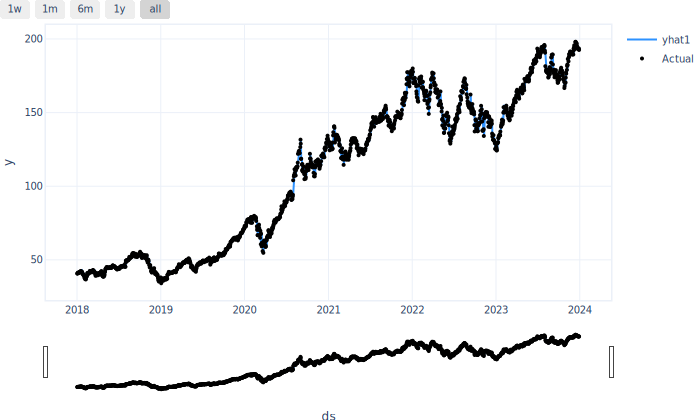

In [42]:
## plot  
m5.plot(fcst=forecast_m5,plotting_backend='plotly-static')

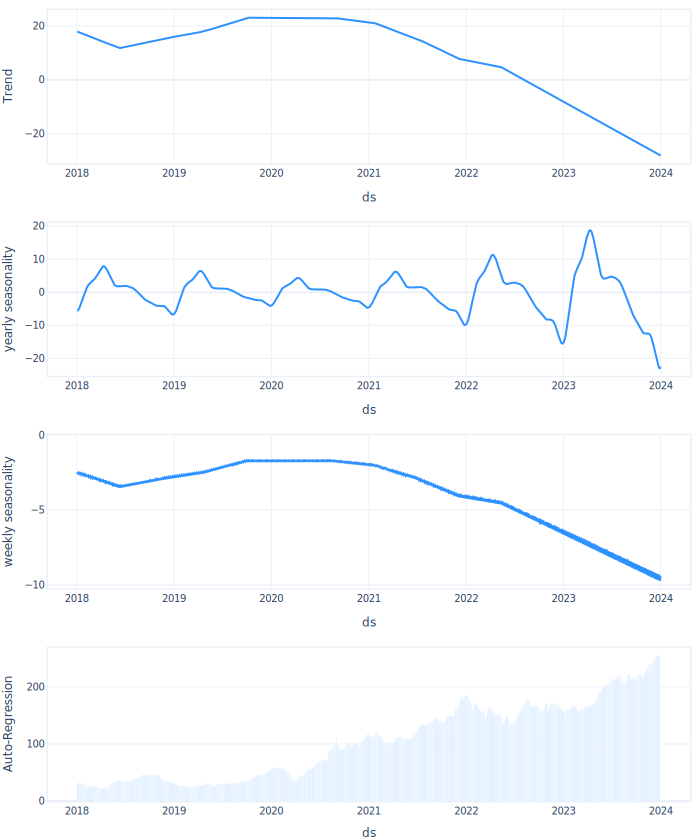

In [43]:
## plot the components  
m5.plot_components(fcst=forecast_m5,plotting_backend="plotly-static")

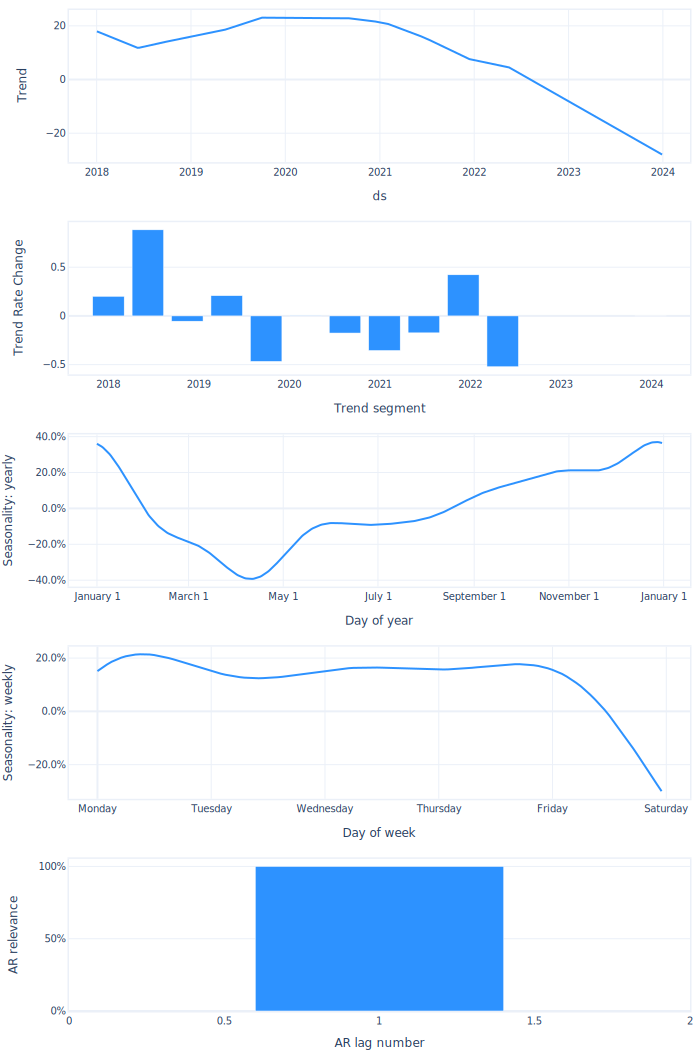

In [79]:
## plot the params 
m5.plot_parameters(forecast_m5,plotting_backend="plotly-static")

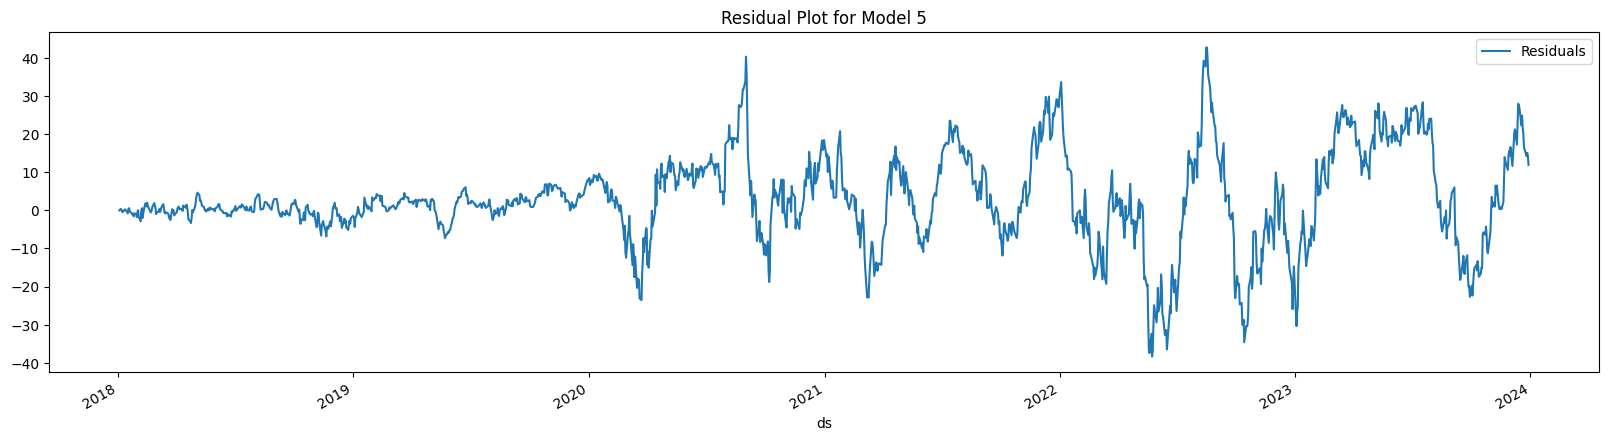

In [45]:
## plot the residuals 
## plotting the residuals for model3 
df_residuals = pd.DataFrame({ 
    "ds":Adjusted_close_df['ds'],"Residuals":Adjusted_close_df['y']-forecast_m5['yhat1']
})
## plot  
df_residuals.plot(x="ds",y="Residuals",figsize=(20,5),title="Residual Plot for Model 5");

### **Model 6 Neural Prophet plus events**

In [46]:
## Model 5 NeuralProphet 
m6 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    learning_rate=0.01, 
    quantiles=None, 
    n_lags=1, 
    ar_layers=[], 
    drop_missing=True
)
## Add country holidays  
m6 = m6.add_country_holidays('US')
## fit the model         
metrics_6 = m6.fit(df=Adjusted_close_df)
## make the future dataframe  
future_m6 = m6.make_future_dataframe(df=Adjusted_close_df,periods=24,n_historic_predictions=True)
## make the fforecast dataframe  
forecast_m6 = m6.predict(df=future_m6)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 55 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing v

Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


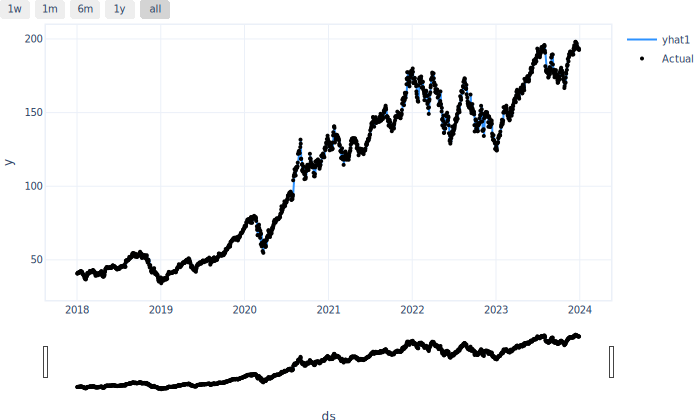

In [48]:
## plot the forecast  
m6.plot(fcst=forecast_m6,plotting_backend="plotly-static")

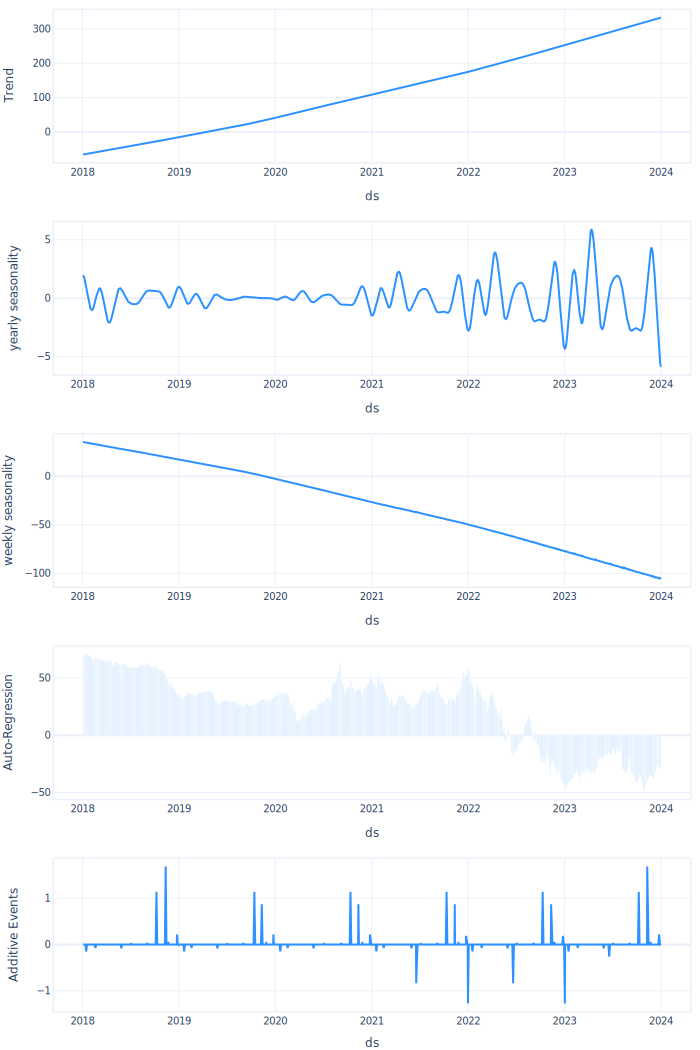

In [53]:
## plot the components  
m6.plot_components(fcst=forecast_m6,plotting_backend="plotly-static")

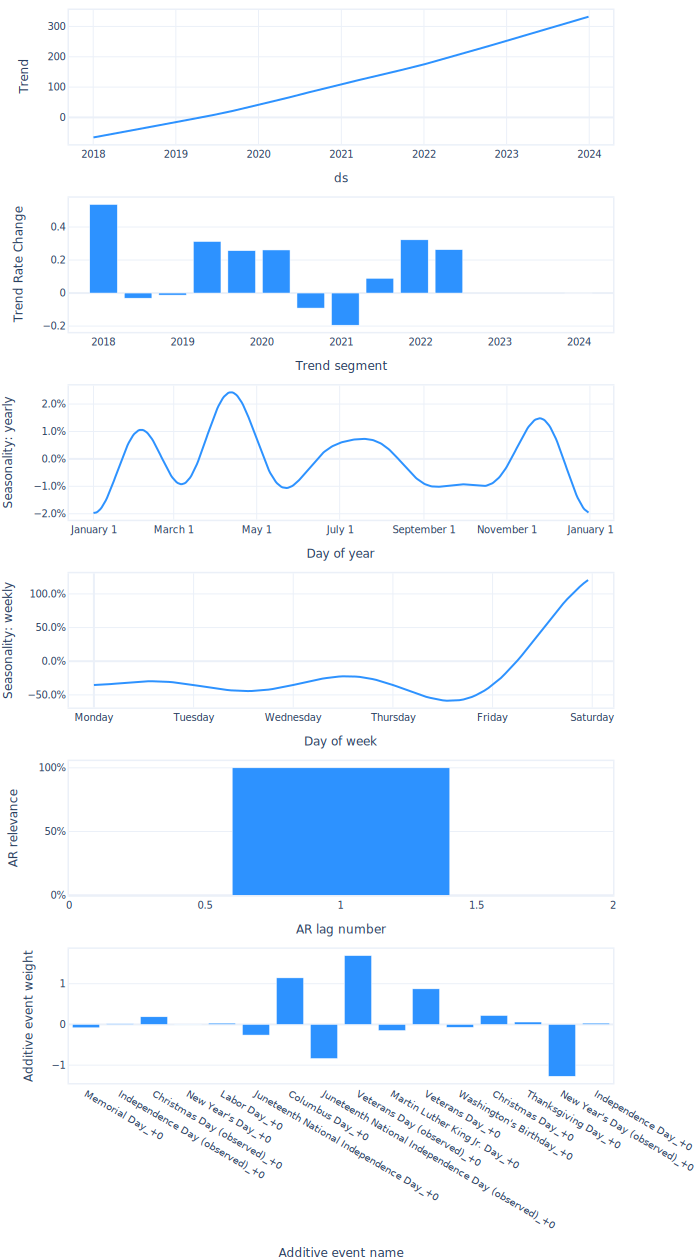

In [52]:
## plot the parameters  
m6.plot_parameters(plotting_backend="plotly-static")

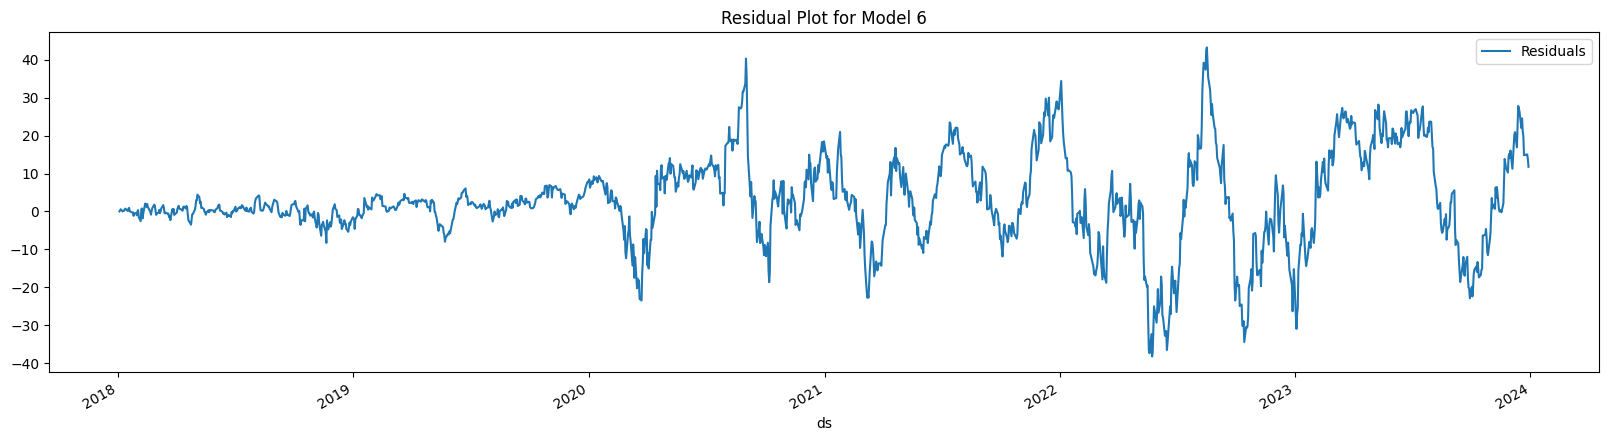

In [54]:
## plot the residuals 
## plotting the residuals for model3 
df_residuals = pd.DataFrame({ 
    "ds":Adjusted_close_df['ds'],"Residuals":Adjusted_close_df['y']-forecast_m6['yhat1']
})
## plot  
df_residuals.plot(x="ds",y="Residuals",figsize=(20,5),title="Residual Plot for Model 6");

### **Uncertainity Modelling**

In [58]:
## Quantile Uncertainity  
confidence_level = 0.95
## lower boundary 
lower_boundary = round((1-confidence_level)/2,3)
## upper boundary  
upper_boundary = round((confidence_level + lower_boundary),3)
## 
quantiles = [lower_boundary, upper_boundary]
## print the qunatiles  
quantiles

[0.025, 0.975]

In [60]:
## specify the model  
m = NeuralProphet(   
    yearly_seasonality= True,
    weekly_seasonality=True, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    quantiles=quantiles, 
    drop_missing=True, 
    n_lags=1, 
    ar_layers=[], 
    learning_rate=0.01
)
## fit the model  
m_metrics = m.fit(df=Adjusted_close_df)
## make future df  
future_m = m.make_future_dataframe(df=Adjusted_close_df,periods=24,n_historic_predictions=True)
## make the forecast 
forecast_m = m.predict(df=future_m)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 55 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing v

Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


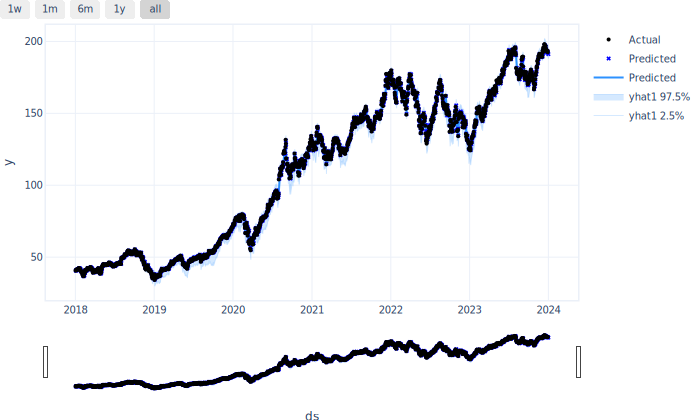

In [65]:
## plot the components
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(fcst=forecast_m,plotting_backend="plotly-static")

### **Conformal Forecast**

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 55 NaN values in column y were auto-imputed.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Added 55 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 55 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 55 NaN values in column y were auto-imputed.


Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


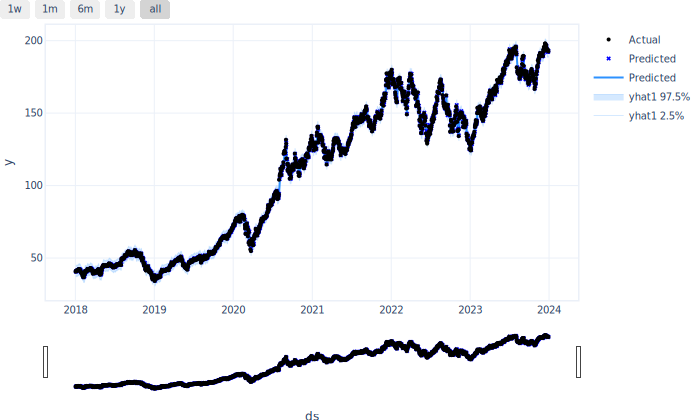

In [69]:
## spli the df 
train_df , calibration_df = m.split_df(df=Adjusted_close_df,valid_p=0.2)
## method 
method ="naive"
##
conformal_forecasts = m.conformal_predict(df=Adjusted_close_df,calibration_df=calibration_df,alpha=0.1,method=method)
## plot 
m.plot(conformal_forecasts,plotting_backend="plotly-static")

### **TRAIN TEST SPLIT**

In [71]:
m = NeuralProphet(learning_rate=0.01)
df_train, df_test = m.split_df(df=Adjusted_close_df, valid_p=0.2)
metrics_train = m.fit(df=df_train)
metrics_train 


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.358% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: 0it [00:00, ?it/s]

MAE        RMSE      Loss  RegLoss  epoch
0    132.837509  161.193314  0.642961      0.0      0
1    123.479156  149.687561  0.589937      0.0      1
2    113.839622  138.075958  0.536289      0.0      2
3    103.761513  125.925369  0.480588      0.0      3
4     92.857498  112.869141  0.420039      0.0      4
..          ...         ...       ...      ...    ...
105    5.686065    7.036075  0.003672      0.0    105
106    5.687853    7.047962  0.003672      0.0    106
107    5.691337    7.050793  0.003680      0.0    107
108    5.689941    7.042191  0.003674      0.0    108
109    5.683918    7.036187  0.003682      0.0    109

[110 rows x 5 columns]

In [72]:
metrics_test = m.test(df=df_test)

metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.03636983409523964    │
│          MAE_val          │     16.19913673400879     │
│         RMSE_val          │     19.80336570739746     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

MAE_val   RMSE_val  Loss_test  RegLoss_test
0  16.199137  19.803366    0.03637           0.0

**cross validation**

In [73]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative","learning_rate":0.01}

folds = NeuralProphet(**params).crossvalidation_split_df(df=Adjusted_close_df, k=5, fold_pct=0.20, fold_overlap_pct=0.5)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B


In [74]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train = m.fit(df=df_train)
    test = m.test(df=df_test)

    # Get the last row (epoch) of the metrics dataframe for train and test
    last_train = train[METRICS].iloc[-1]
    last_test  = test[METRICS_VAL].iloc[-1]

    # Append the last row to the metrics dataframe for train and test
    metrics_train.loc[len(metrics_train)] = last_train
    metrics_test.loc[len(metrics_test)]   = last_test




WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.4512665271759033     │
│          MAE_val          │    25.366037368774414     │
│         RMSE_val          │    27.069000244140625     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.291% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.013% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.07538606971502304    │
│          MAE_val          │    14.616819381713867     │
│         RMSE_val          │    17.856426239013672     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.247% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.16143469512462616    │
│          MAE_val          │     27.79134750366211     │
│         RMSE_val          │    34.884483337402344     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.31% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.013% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.13533693552017212    │
│          MAE_val          │     33.36787033081055     │
│         RMSE_val          │    39.155364990234375     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.358% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.05377209931612015    │
│          MAE_val          │    18.949756622314453     │
│         RMSE_val          │    24.396047592163086     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

#### **Comparing Models**

In [77]:
from prophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Prepare data (predicting the last 24 days to be consistent with our findings from PyCaret)
train = Adjusted_close_df.iloc[:-24].copy()
test =Adjusted_close_df.iloc[-24:].copy()



# Define evaluation function
def evaluate_model_full(model, name, train_data):
    # Check if the model is Prophet (classical) or NeuralProphet
    if isinstance(model, Prophet):
        # Prophet uses periods only
        model.fit(train_data)
        future = model.make_future_dataframe(periods=24)
        
        forecast = model.predict(future)
        forecast = forecast[['ds', 'yhat']].dropna()

        # yhat column for Prophet
        y_pred = forecast['yhat'].values[-24:]

    elif isinstance(model, NeuralProphet):
        # NeuralProphet uses freq + n_historic_predictions
        model.fit(train_data)
        future = model.make_future_dataframe(train_data, periods=24, n_historic_predictions=False)

        forecast = model.predict(future)
        forecast = forecast.dropna(subset=["yhat1"])

        # yhat1 column for NeuralProphet
        y_pred = forecast['yhat1'].values

    else:
        raise ValueError("Unsupported model type. Must be Prophet or NeuralProphet.")

    # Align y_true and y_pred
    y_true = test['y'].values[-len(y_pred):]

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)

    return [name, mae, mape, mse]

# -----------------------------------
# Define models
# -----------------------------------

# M1 - Neural prophet with default settings
m1_eval = NeuralProphet(learning_rate=0.01)

# M2 - prophet with default setting
m2_eval = Prophet()

# M3 
m3_eval = Prophet(
    changepoint_prior_scale=0.05,
    changepoint_range=0.8,
    seasonality_prior_scale=10
)

# M4
m4_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None, 
    learning_rate=0.01
)

# M5
m5_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 1 lag
    drop_missing= True, 
    learning_rate=0.01
    # impute_missing=True
)

# M6
m6_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 1 lag
    drop_missing= True, 
    learning_rate=0.01
    # impute_missing=True
)
m6_eval = m6_eval.add_country_holidays("US")

# Special train/future for M4
train_m6 = train.copy()
future_m6 = m6_eval.make_future_dataframe(train_m6, periods=24, n_historic_predictions=True)




INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [78]:

# -----------------------------------
# Evaluate all models
# -----------------------------------

results = []


# M1
results.append(evaluate_model_full(m1_eval, "M1 - np base", train))

#M2
results.append(evaluate_model_full(m2_eval, "M2 - p base", train))

# M3
results.append(evaluate_model_full(m3_eval, "M3 - p tuned", train))

# M4
results.append(evaluate_model_full(m4_eval, "M4 - np tuned no AR", train))

# M5
results.append(evaluate_model_full(m5_eval, "M5 - np AR-NET", train))

# M6
results.append(evaluate_model_full(m6_eval, "M6 - np AR-NET events", train_m6))



# -----------------------------------
# Final Metrics Table
# -----------------------------------

metrics_table = pd.DataFrame(results, columns=["Model", "MAE", "MAPE (%)", "MSE"])


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 47it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
13:44:33 - cmdstanpy - INFO - Chain [1] start processing
13:44:34 - cmdstanpy - INFO - Chain [1] done processing
13:44:35 - cmdstanpy - INFO - Chain [1] start processing
13:44:36 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 47it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 54 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 54 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 54 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 3D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq B. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency 3D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq B. Ignore         

Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 54 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 54 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 54 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 3D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq B. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency 3D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq B. Ignore         

Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [80]:
metrics_table

Model        MAE   MAPE (%)          MSE
0           M1 - np base  17.683916   9.117633   320.931908
1            M2 - p base   5.979279   3.072993    42.259302
2           M3 - p tuned   5.979279   3.072993    42.259302
3    M4 - np tuned no AR  38.824682  20.034990  1523.049212
4         M5 - np AR-NET   2.715302   1.410326     7.372862
5  M6 - np AR-NET events   2.106476   1.094103     4.437240